In [1]:
cd .. 

/home/jovyan/2018-W-450-4/06-hyper-parameter-tuning


In [2]:
run __init__.py

In [3]:
run src/load_data.py

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.metrics import accuracy_score, f1_score

In [6]:
# !conda install tqdm --yes

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [8]:
adult_train_df = data['adult']['train']['engineered']
adult_train_target = data['adult']['train']['labels']

In [9]:
adult_train_df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
26490,39,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6476,41,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22737,30,0,0,45,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20478,22,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29883,29,0,0,46,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
from time import time

In [11]:
def time_function_call(function):
    def wrapper(*args, **kwargs):
        start = time()
        result = function(*args, **kwargs)
        execution_time = time() - start
        return result, execution_time
    return wrapper

@time_function_call
def model_fit(model, X, y):
    return model.fit(X, y)

@time_function_call
def model_predict(model, X):
    return model.predict(X)

def run_model(model, model_name, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels)
    
    _, fit_time = model_fit(model, X_train, y_train)
    
    train_pred, train_pred_time = model_predict(model, X_train)
    
    test_pred, test_pred_time = model_predict(model, X_test)   
    
    return {
            'model' : model,
            'model_name' : model_name,
            'f1_train_score' : f1_score(y_train, train_pred),
            'f1_test_score' : f1_score(y_test, test_pred),
            'accuracy_train_score' : model.score(X_train, y_train),
            'accuracy_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## F$_1$ Score by Penalty Type and C Value

In [29]:
test_results = []
depths = range(10,100,10)
for features in range(10,100,10):
    for depth in tqdm(depths):
        if features < depth:
            next
        else:
            model = DecisionTreeClassifier(max_features=features, max_depth=depth)
            test_result = run_model(model, 
                                        'dt', 
                                        adult_train_df, 
                                        adult_train_target)
            test_results.append(test_result)

100%|██████████| 9/9 [00:01<00:00,  5.39it/s]


In [30]:
test_results_df = pd.DataFrame(test_results)

In [31]:
test_results_df['max_depth'] = test_results_df.model.apply(lambda model: model.max_depth)
test_results_df['max_features'] = test_results_df.model.apply(lambda model: model.max_features)

In [32]:
test_results_df.head()

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model,model_name,test_pred_time,train_pred_time,max_depth,max_features
0,0.811902,0.826889,0.563495,0.588027,0.017621,"DecisionTreeClassifier(class_weight=None, crit...",dt,0.002407,0.006549,10,10
1,0.826101,0.846833,0.554739,0.617123,0.024798,"DecisionTreeClassifier(class_weight=None, crit...",dt,0.002330,0.006582,10,20
2,0.828015,0.907993,0.634328,0.802241,0.038525,"DecisionTreeClassifier(class_weight=None, crit...",dt,0.002725,0.007985,20,20
3,0.847958,0.867468,0.648987,0.698451,0.031216,"DecisionTreeClassifier(class_weight=None, crit...",dt,0.002528,0.006592,10,30
4,0.832802,0.922034,0.637370,0.827367,0.049539,"DecisionTreeClassifier(class_weight=None, crit...",dt,0.002824,0.007877,20,30


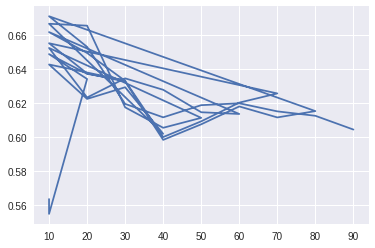

In [34]:
l1_test_results = test_results_df[test_results_df.model_name == 'dt']
#l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.max_depth, l1_test_results.f1_test_score, label='l1 penalty')
#plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
#plt.legend()

In [52]:
test_results = []
depths = range(5,30,1)
for features in range(5,30,1):
    for depth in tqdm(depths):
        if features < depth:
            next
        else:
            model = DecisionTreeClassifier(max_features=features, max_depth=depth)
            test_result = run_model(model, 
                                        features, 
                                        adult_train_df, 
                                        adult_train_target)
            test_results.append(test_result)

100%|██████████| 25/25 [00:02<00:00,  9.55it/s]


In [39]:
test_results_df.head()

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model,model_name,test_pred_time,train_pred_time,depth
0,0.825144,0.841515,0.551922,0.598491,0.016006,"DecisionTreeClassifier(class_weight=None, crit...",10,0.002154,0.006608,10
1,0.855935,0.857150,0.660143,0.664753,0.023421,"DecisionTreeClassifier(class_weight=None, crit...",20,0.002024,0.006083,10
2,0.837269,0.918896,0.631503,0.817562,0.036265,"DecisionTreeClassifier(class_weight=None, crit...",20,0.002362,0.007250,20
3,0.847798,0.865181,0.622328,0.663481,0.032013,"DecisionTreeClassifier(class_weight=None, crit...",30,0.002136,0.006651,10
4,0.845246,0.916715,0.658691,0.814675,0.052824,"DecisionTreeClassifier(class_weight=None, crit...",30,0.002784,0.008529,20


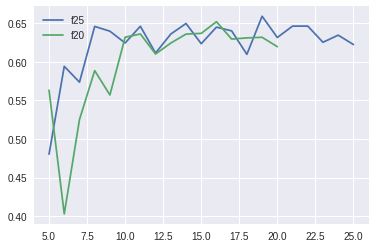

In [63]:
test_results_df = pd.DataFrame(test_results)

test_results_df['depth'] = test_results_df.model.apply(lambda model: model.max_depth)

f25_feat_test_results = test_results_df[test_results_df.model_name == 25]
f20_feat_test_results = test_results_df[test_results_df.model_name == 20]
plt.plot(f25_feat_test_results.depth, f25_feat_test_results.f1_test_score, label='f25')
plt.plot(f20_feat_test_results.depth, f20_feat_test_results.f1_test_score, label='f20')
#plt.xscale('log')
plt.legend()

In [ ]:
test_results = []
c_values = np.logspace(-1,5,12)
for regularization_type in ['l1', 'l2']:
    for c in tqdm(c_values):
        model = LogisticRegression(penalty=regularization_type, C=c)
        test_result = run_model(model, 
                                regularization_type, 
                                adult_train_df, 
                                adult_train_target)
        test_results.append(test_result)

In [ ]:
test_results_df = pd.DataFrame(test_results)

test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)

l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']
plt.plot(l1_test_results.C, l1_test_results.f1_test_score, label='l1 penalty')
plt.plot(l2_test_results.C, l2_test_results.f1_test_score, label='l2 penalty')
plt.xscale('log')
plt.legend()

In [ ]:
test_results = []
c_values = np.logspace(-1,5,12)

for _ in range(10):
    for regularization_type in ['l1', 'l2']:
        for c in tqdm(c_values):
            model = LogisticRegression(penalty=regularization_type, C=c)
            test_result = run_model(model, 
                                    regularization_type, 
                                    adult_train_df, 
                                    adult_train_target)
            test_results.append(test_result)

In [ ]:
test_results_df = pd.DataFrame(test_results)
test_results_df['C'] = test_results_df.model.apply(lambda model: model.C)
l1_test_results = test_results_df[test_results_df.model_name == 'l1']
l2_test_results = test_results_df[test_results_df.model_name == 'l2']

In [61]:
from matplotlib.cm import viridis_r

In [62]:
k = int(len(viridis_r.colors)/12)
colors = [col for i, col in enumerate(viridis_r.colors) if i % 21 == 0]

TypeError: len() of unsized object

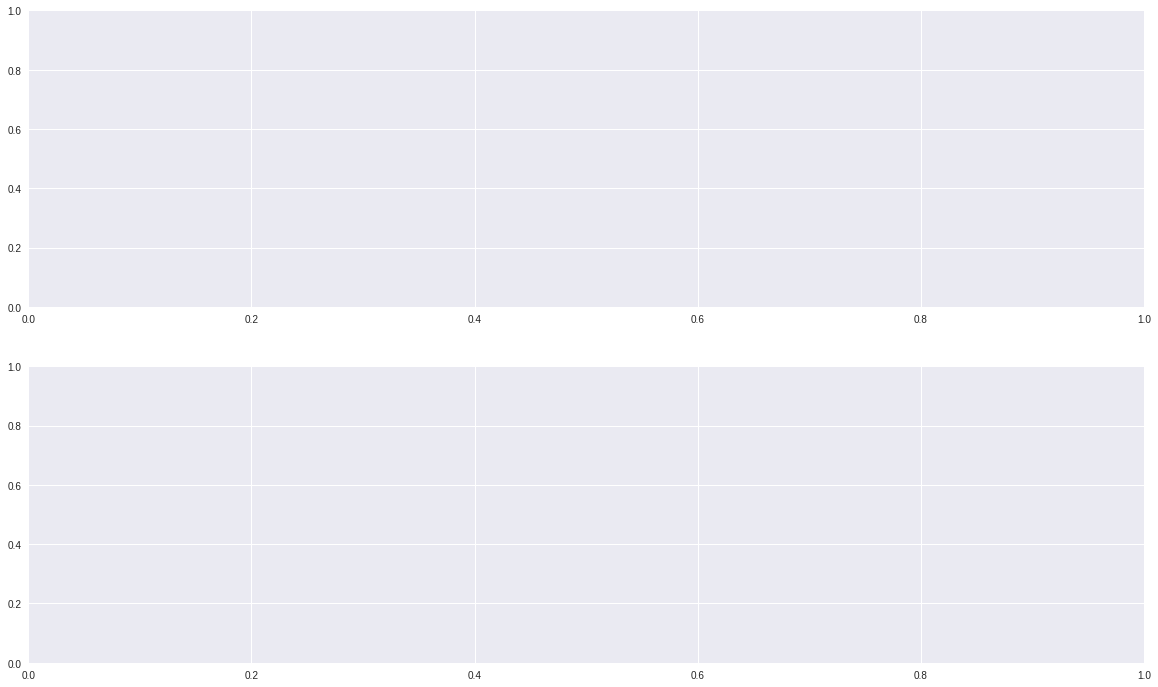

In [72]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,12))
for i, depth in enumerate(f25_feat_test_results.depth.unique()): 
    f25_feat_test_results_for_d = f25_feat_test_results[f25_feat_test_results.depth == depth]
    sns.distplot(f25_feat_test_results_for_d.f1_test_score, label=str(depth), ax=ax1, color=colors[i])
   # l2_test_results_for_C = l2_test_results[l2_test_results.C == C]
   # sns.distplot(l2_test_results_for_C.f1_test_score, label=str(C), ax=ax2, color=colors[i])
ax1.set_xlim(0.6,0.7)
ax1.set_title('Distribution of L1 penalty performance')
ax1.legend()
ax2.set_xlim(0.6,0.7)
ax2.set_title('Distribution of L2 penalty performance')
ax2.legend()


In [71]:
f25_feat_test_results.depth.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25])